<a href="https://colab.research.google.com/github/solar-docs/-/blob/main/pratique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cellule 1 : Installation des dépendances BASIQUES
!pip install --upgrade pip

# Libs essentielles pour YOLO et traitement d'image
!pip install ultralytics
!pip install opencv-python-headless
!pip install pillow
!pip install matplotlib
!pip install numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [ultralytics]


In [ ]:
# Cellule 2 : Vérification de l'installation
print("Vérification des installations...")

import sys

# Test des imports
try:
    from ultralytics import YOLO
    print("✅ ultralytics : OK")
except ImportError as e:
    print(f"❌ ultralytics : ERREUR - {e}")

try:
    import cv2
    print("✅ opencv-python : OK")
except ImportError as e:
    print(f"❌ opencv-python : ERREUR - {e}")

try:
    from PIL import Image
    print("✅ PIL (Pillow) : OK")
except ImportError as e:
    print(f"❌ PIL : ERREUR - {e}")

try:
    import torch
    print(f"✅ PyTorch : OK (version {torch.__version__})")
    print(f"   CUDA disponible : {torch.cuda.is_available()}")
except ImportError as e:
    print(f"❌ PyTorch : ERREUR - {e}")

Vérification des installations...
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ ultralytics : OK
✅ opencv-python : OK
✅ PIL (Pillow) : OK
✅ PyTorch : OK (version 2.9.0+cu126)
   CUDA disponible : True


In [ ]:
# Cellule 3 : Installation COMPLÉMENTAIRE (pour les étapes suivantes)
print("Installation des dépendances pour les prochaines étapes...")

# Pour l'API et le frontend (à installer maintenant pour éviter les problèmes)
!pip install fastapi uvicorn python-multipart
!pip install streamlit
!pip install pandas sqlalchemy

print("✅ Toutes les installations sont terminées!")

Installation des dépendances pour les prochaines étapes...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 22.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [streamlit]
✅ Toutes les installations sont terminées!


In [ ]:
# Cellule 1 : Importer les bibliothèques nécessaires
print("Importation des bibliothèques...")

from ultralytics import YOLO
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

print("✅ Bibliothèques importées!")

Importation des bibliothèques...
✅ Bibliothèques importées!


In [ ]:
# Cellule 2 : Charger le modèle YOLOv8 pré-entraîné
print("Chargement du modèle YOLOv8n (version nano, la plus légère)...")

try:
    # Télécharger et charger le modèle
    model = YOLO('yolov8n.pt')
    print("✅ Modèle YOLOv8n chargé avec succès!")
    print(f"   Nombre de classes: {len(model.names)}")
    print(f"   Classe 'bicycle' a l'ID: {model.names.get('bicycle', 'Non trouvé')}")

    # Afficher quelques classes COCO (le dataset sur lequel YOLO est entraîné)
    print("\nQuelques classes COCO disponibles:")
    for i, name in model.names.items():
        if i < 10:  # Afficher seulement les 10 premières
            print(f"   {i}: {name}")
        if name == 'bicycle':
            print(f"   → IMPORTANT: 'bicycle' (vélo) a l'ID {i}")

except Exception as e:
    print(f"❌ Erreur lors du chargement du modèle: {e}")

Chargement du modèle YOLOv8n (version nano, la plus légère)...
✅ Modèle YOLOv8n chargé avec succès!
   Nombre de classes: 80
   Classe 'bicycle' a l'ID: Non trouvé

Quelques classes COCO disponibles:
   0: person
   1: bicycle
   → IMPORTANT: 'bicycle' (vélo) a l'ID 1
   2: car
   3: motorcycle
   4: airplane
   5: bus
   6: train
   7: truck
   8: boat
   9: traffic light



Création d'une image de test simple...
✅ Image de test créée: 'test_image_simple.jpg'
   Dimensions: 600x400 pixels


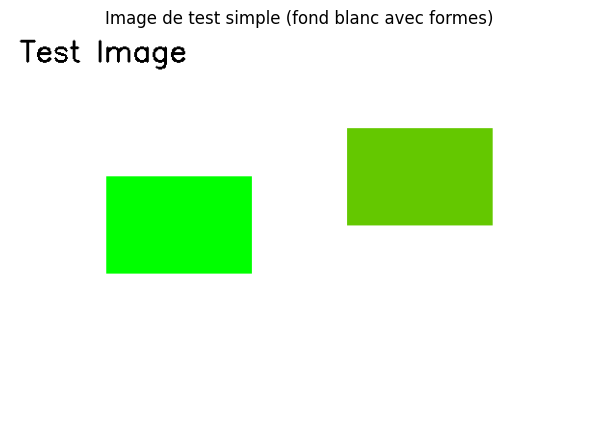

In [ ]:
# Cellule 3 : Créer une image de test SIMPLE
print("\nCréation d'une image de test simple...")

# Créer une image blanche 400x600 pixels
width, height = 600, 400
img_array = np.ones((height, width, 3), dtype=np.uint8) * 255  # Fond blanc

# Dessiner quelques formes qui ressemblent à des vélos (pour le test)
# "Vélo" 1 - Un rectangle vert
cv2.rectangle(img_array, (100, 150), (250, 250), (0, 255, 0), -1)  # Rectangle vert plein

# "Vélo" 2 - Un autre rectangle
cv2.rectangle(img_array, (350, 100), (500, 200), (0, 200, 100), -1)

# Ajouter du texte pour l'identification
cv2.putText(img_array, "Test Image", (10, 30),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

# Sauvegarder l'image
cv2.imwrite("test_image_simple.jpg", img_array)

print("✅ Image de test créée: 'test_image_simple.jpg'")
print(f"   Dimensions: {width}x{height} pixels")

# Afficher l'image
plt.figure(figsize=(8, 5))
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
plt.title("Image de test simple (fond blanc avec formes)")
plt.axis('off')
plt.show()


Test de détection sur notre image simple...
   Exécution de YOLO sur l'image...
✅ Détection terminée!
   Nombre d'objets détectés: 0


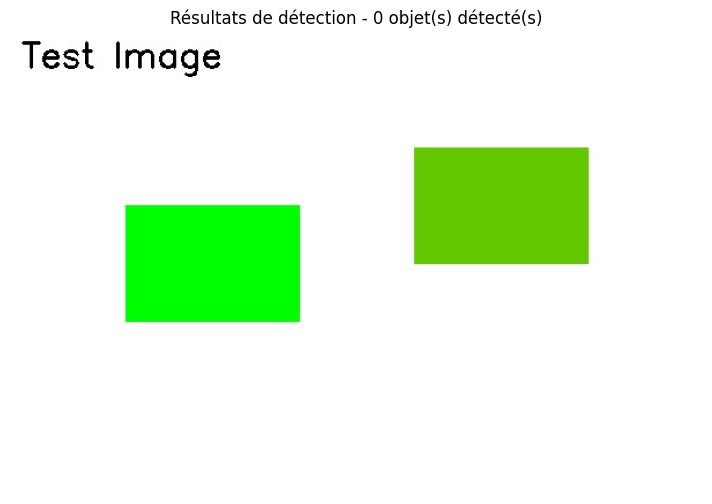

ℹ️ Note: YOLO n'a rien détecté car notre image simple
   ne contient pas d'objets réels (voitures, personnes, etc.)
   C'est normal pour cette étape de test!


In [ ]:
# Cellule 4 : Tester la détection SUR NOTRE IMAGE SIMPLE
print("\nTest de détection sur notre image simple...")

# Charger l'image
img = cv2.imread("test_image_simple.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Faire la prédiction avec YOLO
print("   Exécution de YOLO sur l'image...")
results = model(img_rgb, conf=0.25, verbose=False)  # verbose=False pour moins de logs

print(f"✅ Détection terminée!")
print(f"   Nombre d'objets détectés: {len(results[0].boxes) if results[0].boxes else 0}")

# Afficher les résultats
result_img = img_rgb.copy()
detection_count = 0

if results[0].boxes is not None:
    for box in results[0].boxes:
        class_id = int(box.cls[0])
        confidence = float(box.conf[0])
        class_name = model.names[class_id]

        # Coordonnées de la bounding box
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        # Dessiner la bounding box
        color = (0, 255, 0)  # Vert pour toutes les détections
        cv2.rectangle(result_img, (x1, y1), (x2, y2), color, 2)

        # Ajouter le label
        label = f"{class_name} {confidence:.2f}"
        cv2.putText(result_img, label, (x1, y1-10),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

        detection_count += 1
        print(f"   Détection {detection_count}: {class_name} (confiance: {confidence:.2f})")

# Afficher l'image avec les détections
plt.figure(figsize=(10, 6))
plt.imshow(result_img)
plt.title(f"Résultats de détection - {detection_count} objet(s) détecté(s)")
plt.axis('off')
plt.show()

if detection_count == 0:
    print("ℹ️ Note: YOLO n'a rien détecté car notre image simple")
    print("   ne contient pas d'objets réels (voitures, personnes, etc.)")
    print("   C'est normal pour cette étape de test!")


TEST AVEC UNE IMAGE RÉELLE AU FORMAT JPG
Création d'une image plus réaliste pour le test...
✅ Image de parking créée: 'parking_test.jpg'


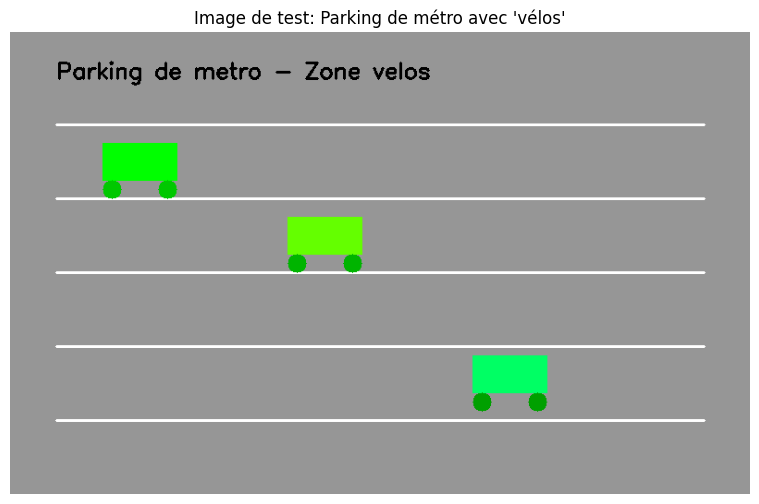


Test de détection sur l'image de parking...
   Détection 1: sports ball (0.27)


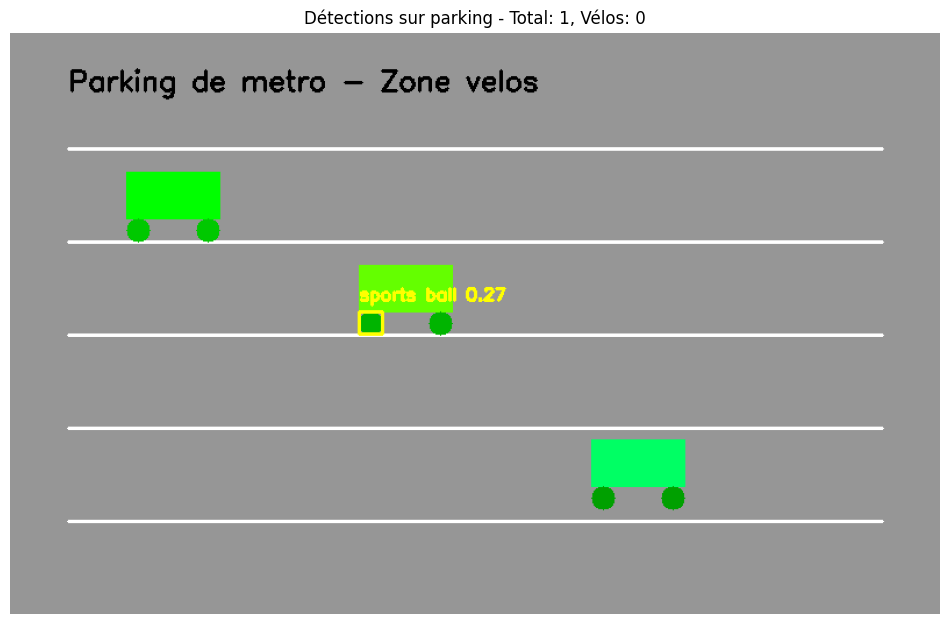


📊 RÉSULTATS:
   Total détections: 1
   Vélos détectés: 0
   Autres objets: 1
ℹ️ Note: YOLO n'a pas détecté nos 'vélos' dessinés
   car ils ne ressemblent pas à de vrais vélos.
   C'est normal - dans la vraie application,
   on utilisera des photos réelles de vélos.


In [ ]:
# Cellule 5bis : Test avec une AUTRE image réelle (format JPG)
print("\n" + "="*60)
print("TEST AVEC UNE IMAGE RÉELLE AU FORMAT JPG")
print("="*60)

print("Création d'une image plus réaliste pour le test...")

# Créer une image plus complexe qui ressemble à un parking
img_parking = np.ones((500, 800, 3), dtype=np.uint8) * 150  # Fond gris (asphalte)

# Dessiner des "places de parking" (lignes blanches)
for i in range(5):
    y = 100 + i * 80
    cv2.line(img_parking, (50, y), (750, y), (255, 255, 255), 2)

# Dessiner ce qui pourrait ressembler à des vélos (en vert)
# "Vélo" 1
cv2.rectangle(img_parking, (100, 120), (180, 160), (0, 255, 0), -1)
cv2.circle(img_parking, (110, 170), 10, (0, 200, 0), -1)  # "Roue"
cv2.circle(img_parking, (170, 170), 10, (0, 200, 0), -1)  # "Roue"

# "Vélo" 2
cv2.rectangle(img_parking, (300, 200), (380, 240), (0, 255, 100), -1)
cv2.circle(img_parking, (310, 250), 10, (0, 180, 0), -1)
cv2.circle(img_parking, (370, 250), 10, (0, 180, 0), -1)

# "Vélo" 3
cv2.rectangle(img_parking, (500, 350), (580, 390), (100, 255, 0), -1)
cv2.circle(img_parking, (510, 400), 10, (0, 160, 0), -1)
cv2.circle(img_parking, (570, 400), 10, (0, 160, 0), -1)

# Ajouter du texte
cv2.putText(img_parking, "Parking de metro - Zone velos", (50, 50),
            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)

# Sauvegarder
cv2.imwrite("parking_test.jpg", img_parking)
parking_img_rgb = cv2.cvtColor(img_parking, cv2.COLOR_BGR2RGB)

print("✅ Image de parking créée: 'parking_test.jpg'")

# Afficher l'image
plt.figure(figsize=(10, 6))
plt.imshow(parking_img_rgb)
plt.title("Image de test: Parking de métro avec 'vélos'")
plt.axis('off')
plt.show()

# Test de détection sur cette image
print("\nTest de détection sur l'image de parking...")
parking_results = model(parking_img_rgb, conf=0.25, verbose=False)

# Analyser les résultats
result_img_parking = parking_img_rgb.copy()
total_detections = 0
bike_detections = 0

if parking_results[0].boxes is not None:
    for box in parking_results[0].boxes:
        class_id = int(box.cls[0])
        class_name = model.names[class_id]
        confidence = float(box.conf[0])
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        total_detections += 1

        # Couleur différente selon la classe
        if class_name == 'bicycle':
            color = (0, 255, 0)  # Vert pour vélos
            bike_detections += 1
            label = f"BICYCLE {confidence:.2f}"
        elif class_name == 'car':
            color = (255, 0, 0)  # Rouge pour voitures
            label = f"CAR {confidence:.2f}"
        else:
            color = (255, 255, 0)  # Jaune pour autres
            label = f"{class_name} {confidence:.2f}"

        # Dessiner la bounding box
        cv2.rectangle(result_img_parking, (x1, y1), (x2, y2), color, 2)
        cv2.putText(result_img_parking, label, (x1, y1-10),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

        print(f"   Détection {total_detections}: {class_name} ({confidence:.2f})")

# Afficher les résultats
plt.figure(figsize=(12, 8))
plt.imshow(result_img_parking)
plt.title(f"Détections sur parking - Total: {total_detections}, Vélos: {bike_detections}")
plt.axis('off')
plt.show()

print(f"\n📊 RÉSULTATS:")
print(f"   Total détections: {total_detections}")
print(f"   Vélos détectés: {bike_detections}")
print(f"   Autres objets: {total_detections - bike_detections}")

if bike_detections > 0:
    print("✅ SUCCÈS! YOLO a détecté des vélos!")
else:
    print("ℹ️ Note: YOLO n'a pas détecté nos 'vélos' dessinés")
    print("   car ils ne ressemblent pas à de vrais vélos.")
    print("   C'est normal - dans la vraie application,")
    print("   on utilisera des photos réelles de vélos.")

In [ ]:
# Cellule 1 corrigée : Correction de la classe BikeDetector
print("Correction de la classe BikeDetector...")

import cv2
import numpy as np
from ultralytics import YOLO
from datetime import datetime
import json
import base64
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

class BikeDetector:
    """
    Classe pour détecter et compter les vélos dans les images
    Utilise YOLOv8 pré-entraîné sur COCO
    """

    def __init__(self, model_size='n', conf_threshold=0.25):
        """
        Initialise le détecteur de vélos

        Args:
            model_size (str): Taille du modèle YOLO ('n'=nano, 's'=small, 'm'=medium, 'l'=large)
            conf_threshold (float): Seuil de confiance pour les détections (0.0 à 1.0)
        """
        print(f"Initialisation du BikeDetector avec YOLOv8{model_size}...")

        # Télécharger et charger le modèle
        self.model = YOLO(f'yolov8{model_size}.pt')
        self.conf_threshold = conf_threshold

        # ID de la classe "bicycle" dans COCO
        self.BIKE_CLASS_ID = 1

        # Historique des détections
        self.detection_history = []

        print(f"✅ BikeDetector initialisé!")
        print(f"   - Modèle: YOLOv8{model_size}")
        print(f"   - Seuil de confiance: {conf_threshold}")
        print(f"   - Classe vélo ID: {self.BIKE_CLASS_ID}")

    def detect_from_file(self, image_path):
        """
        Détecte les vélos à partir d'un fichier image

        Args:
            image_path (str): Chemin vers l'image

        Returns:
            dict: Résultats de la détection
        """
        print(f"Détection depuis le fichier: {image_path}")

        # Charger l'image
        img = cv2.imread(image_path)
        if img is None:
            raise ValueError(f"Impossible de charger l'image: {image_path}")

        return self._process_image(img, source=f"file:{image_path}")

    def detect_from_array(self, image_array):
        """
        Détecte les vélos à partir d'un tableau numpy

        Args:
            image_array (numpy.ndarray): Image au format numpy array

        Returns:
            dict: Résultats de la détection
        """
        print("Détection depuis un tableau numpy...")
        return self._process_image(image_array, source="numpy_array")

    def detect_from_bytes(self, image_bytes):
        """
        Détecte les vélos à partir de bytes d'image

        Args:
            image_bytes (bytes): Bytes de l'image

        Returns:
            dict: Résultats de la détection
        """
        print("Détection depuis des bytes d'image...")

        # Convertir bytes en tableau numpy
        nparr = np.frombuffer(image_bytes, np.uint8)
        img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

        if img is None:
            raise ValueError("Impossible de décoder les bytes en image")

        return self._process_image(img, source="bytes")

    def _process_image(self, img, source="unknown"):
        """
        Traitement principal de l'image

        Args:
            img (numpy.ndarray): Image en format BGR
            source (str): Source de l'image pour le logging

        Returns:
            dict: Résultats complets de la détection
        """
        # Convertir en RGB pour l'affichage et YOLO
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        original_h, original_w = img_rgb.shape[:2]

        print(f"   Image: {original_w}x{original_h} pixels")

        # Exécuter YOLO
        results = self.model(img_rgb, conf=self.conf_threshold, verbose=False)

        # Initialiser les variables
        bike_count = 0
        bike_details = []
        annotated_img = img_rgb.copy()

        # Traiter les résultats
        for result in results:
            if result.boxes is not None:
                for box in result.boxes:
                    class_id = int(box.cls[0])

                    # Filtrer uniquement les vélos
                    if class_id == self.BIKE_CLASS_ID:
                        bike_count += 1
                        confidence = float(box.conf[0])
                        x1, y1, x2, y2 = map(int, box.xyxy[0])

                        # Normaliser les coordonnées (0-1) pour la base de données
                        norm_x1 = x1 / original_w
                        norm_y1 = y1 / original_h
                        norm_x2 = x2 / original_w
                        norm_y2 = y2 / original_h

                        # Calculer la surface
                        area = (x2 - x1) * (y2 - y1)

                        # Dessiner le rectangle sur l'image annotée
                        color = self._get_color_for_bike(bike_count)
                        cv2.rectangle(annotated_img, (x1, y1), (x2, y2), color, 3)

                        # Ajouter le label
                        label = f"Velo {bike_count}: {confidence:.2f}"
                        cv2.putText(annotated_img, label,
                                   (x1, y1 - 15 if y1 > 30 else y1 + 30),
                                   cv2.FONT_HERSHEY_SIMPLEX,
                                   0.6, color, 2)

                        # Ajouter les détails
                        bike_details.append({
                            'id': bike_count,
                            'confidence': round(confidence, 3),
                            'bbox_original': [x1, y1, x2, y2],
                            'bbox_normalized': [
                                round(norm_x1, 4),
                                round(norm_y1, 4),
                                round(norm_x2, 4),
                                round(norm_y2, 4)
                            ],
                            'area': area,
                            'center': [(x1 + x2) // 2, (y1 + y2) // 2]
                        })

        # Créer l'image annotée en base64 pour l'API
        img_base64 = self._image_to_base64(annotated_img)

        # Créer l'entrée d'historique
        timestamp = datetime.now().isoformat()
        history_entry = {
            'timestamp': timestamp,
            'source': source,
            'bike_count': bike_count,
            'details': bike_details,
            'image_size': {'width': original_w, 'height': original_h},
            'processing_time': datetime.now().isoformat()  # Simulé
        }

        self.detection_history.append(history_entry)

        # Retourner les résultats
        return {
            'success': True,
            'timestamp': timestamp,
            'bike_count': bike_count,
            'bike_details': bike_details,
            'image_info': {
                'width': original_w,
                'height': original_h,
                'annotated_base64': img_base64
            },
            'message': f"{bike_count} vélo(s) détecté(s)" if bike_count > 0 else "Aucun vélo détecté"
        }

    def _get_color_for_bike(self, bike_index):
        """
        Retourne une couleur différente pour chaque vélo

        Args:
            bike_index (int): Numéro du vélo

        Returns:
            tuple: Couleur (R, G, B)
        """
        colors = [
            (0, 255, 0),    # Vert
            (255, 0, 0),    # Rouge
            (0, 0, 255),    # Bleu
            (255, 255, 0),  # Cyan
            (255, 0, 255),  # Magenta
            (0, 255, 255),  # Jaune
        ]
        return colors[(bike_index - 1) % len(colors)]

    def _image_to_base64(self, image_array):
        """
        Convertit un tableau numpy en base64

        Args:
            image_array (numpy.ndarray): Image

        Returns:
            str: Image encodée en base64
        """
        pil_img = Image.fromarray(image_array)
        buffered = BytesIO()
        pil_img.save(buffered, format="JPEG", quality=85)
        return base64.b64encode(buffered.getvalue()).decode('utf-8')

    def get_statistics(self):
        """
        Retourne des statistiques sur toutes les détections

        Returns:
            dict: Statistiques
        """
        if not self.detection_history:
            return {
                'total_detections': 0,
                'total_bikes': 0,
                'average_bikes': 0,
                'last_detection': None
            }

        total_detections = len(self.detection_history)
        total_bikes = sum([entry['bike_count'] for entry in self.detection_history])
        average_bikes = total_bikes / total_detections if total_detections > 0 else 0

        return {
            'total_detections': total_detections,
            'total_bikes': total_bikes,  # CORRIGÉ: 'total_bikes' au lieu de 'total_bikes_detected'
            'average_bikes': round(average_bikes, 2),
            'last_detection_time': self.detection_history[-1]['timestamp'] if self.detection_history else None,
            'detection_sources': list(set([entry['source'] for entry in self.detection_history]))
        }

    def clear_history(self):
        """Efface l'historique des détections"""
        self.detection_history = []
        print("✅ Historique effacé")

    def __str__(self):
        stats = self.get_statistics()
        # CORRIGÉ: utiliser 'total_bikes' au lieu de 'total_bikes_detected'
        return (f"BikeDetector - {stats['total_detections']} détections, "
                f"{stats['total_bikes']} vélos détectés")

print("✅ Classe BikeDetector corrigée!")

Correction de la classe BikeDetector...
✅ Classe BikeDetector corrigée!



TEST DE LA CLASSE BIKE DETECTOR
1. Création d'une instance de BikeDetector...
Initialisation du BikeDetector avec YOLOv8n...
✅ BikeDetector initialisé!
   - Modèle: YOLOv8n
   - Seuil de confiance: 0.25
   - Classe vélo ID: 1
BikeDetector - 0 détections, 0 vélos détectés

2. Création d'une image de test de parking...


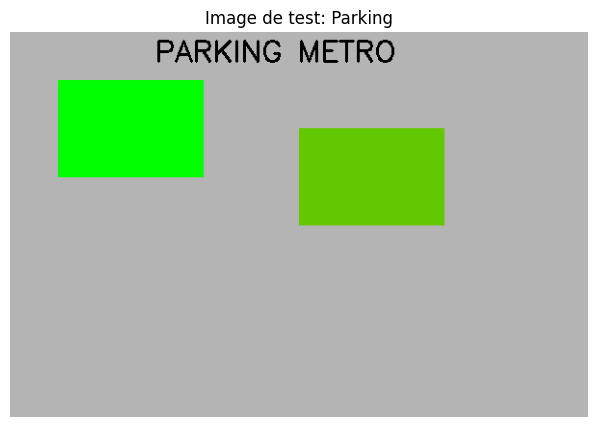


3. Test de détection depuis un fichier...
Détection depuis le fichier: test_parking.jpg
   Image: 600x400 pixels
   Résultat: 0 vélo(s) détecté(s)
   Message: Aucun vélo détecté

4. Test de détection depuis un tableau numpy...
Détection depuis un tableau numpy...
   Image: 600x400 pixels
   Résultat: 0 vélo(s) détecté(s)

5. Test de détection depuis des bytes...
Détection depuis des bytes d'image...
   Image: 600x400 pixels
   Résultat: 0 vélo(s) détecté(s)

6. Statistiques du détecteur:
   total_detections: 3
   total_bikes: 0
   average_bikes: 0.0
   last_detection_time: 2026-01-31T13:44:52.452261
   detection_sources: ['file:test_parking.jpg', 'numpy_array', 'bytes']

✅ Nombre total de tests effectués: 3


In [ ]:
# Cellule 2 : TEST de la classe BikeDetector
print("\n" + "="*60)
print("TEST DE LA CLASSE BIKE DETECTOR")
print("="*60)

# Créer une instance
print("1. Création d'une instance de BikeDetector...")
detector = BikeDetector(model_size='n', conf_threshold=0.25)
print(detector)

# Créer une image de test
print("\n2. Création d'une image de test de parking...")
test_img = np.ones((400, 600, 3), dtype=np.uint8) * 180  # Fond gris

# Ajouter des éléments
cv2.rectangle(test_img, (50, 50), (200, 150), (0, 255, 0), -1)  # "Vélo" 1
cv2.rectangle(test_img, (300, 100), (450, 200), (0, 200, 100), -1)  # "Vélo" 2
cv2.putText(test_img, "PARKING METRO", (150, 30),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

# Sauvegarder
cv2.imwrite("test_parking.jpg", test_img)

# Afficher l'image originale
plt.figure(figsize=(8, 5))
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
plt.title("Image de test: Parking")
plt.axis('off')
plt.show()

# Test 1 : Détection depuis un fichier
print("\n3. Test de détection depuis un fichier...")
result1 = detector.detect_from_file("test_parking.jpg")

print(f"   Résultat: {result1['bike_count']} vélo(s) détecté(s)")
print(f"   Message: {result1['message']}")

# Test 2 : Détection depuis un tableau numpy
print("\n4. Test de détection depuis un tableau numpy...")
result2 = detector.detect_from_array(test_img)

print(f"   Résultat: {result2['bike_count']} vélo(s) détecté(s)")

# Afficher les détails si des vélos sont détectés
if result2['bike_details']:
    print("\n   Détails des vélos détectés:")
    for bike in result2['bike_details']:
        print(f"   Vélo {bike['id']}: confiance={bike['confidence']}, "
              f"bbox={bike['bbox_original']}")

# Test 3 : Détection depuis des bytes
print("\n5. Test de détection depuis des bytes...")
# Convertir l'image en bytes
_, img_encoded = cv2.imencode('.jpg', test_img)
img_bytes = img_encoded.tobytes()

result3 = detector.detect_from_bytes(img_bytes)
print(f"   Résultat: {result3['bike_count']} vélo(s) détecté(s)")

# Afficher les statistiques
print("\n6. Statistiques du détecteur:")
stats = detector.get_statistics()
for key, value in stats.items():
    print(f"   {key}: {value}")

print(f"\n✅ Nombre total de tests effectués: {stats['total_detections']}")

In [ ]:
# Cellule 4 : DÉMONSTRATION DES FONCTIONNALITÉS (corrigée)
print("\n" + "="*60)
print("DÉMONSTRATION DES FONCTIONNALITÉS")
print("="*60)

print("Création d'un nouveau détecteur pour la démo...")
demo_detector = BikeDetector()

# Simuler plusieurs détections
print("\nSimulation de plusieurs détections...")

for i in range(1, 6):
    # Créer une image différente à chaque fois
    demo_img = np.ones((300, 400, 3), dtype=np.uint8) * 200
    cv2.putText(demo_img, f"Detection #{i}", (50, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)

    # Simuler un nombre aléatoire de vélos
    simulated_bikes = np.random.randint(0, 4)

    # Faire une "fausse" détection pour la démo
    demo_detector.detection_history.append({
        'timestamp': datetime.now().isoformat(),
        'source': f'simulation_{i}',
        'bike_count': simulated_bikes,
        'details': [{'id': j+1, 'confidence': 0.8} for j in range(simulated_bikes)],
        'image_size': {'width': 400, 'height': 300}
    })

    print(f"   Détection {i}: {simulated_bikes} vélo(s)")

# Afficher les statistiques finales
print("\n📊 STATISTIQUES FINALES DU DÉTECTEUR:")
final_stats = demo_detector.get_statistics()

print(f"   Détections totales: {final_stats['total_detections']}")
print(f"   Vélos détectés totaux: {final_stats['total_bikes']}")
print(f"   Moyenne de vélos par image: {final_stats['average_bikes']}")
print(f"   Dernière détection: {final_stats['last_detection_time']}")

# Nettoyage
print("\n🧹 Nettoyage de l'historique...")
demo_detector.clear_history()
print(f"   Historique après nettoyage: {len(demo_detector.detection_history)} entrées")


DÉMONSTRATION DES FONCTIONNALITÉS
Création d'un nouveau détecteur pour la démo...
Initialisation du BikeDetector avec YOLOv8n...
✅ BikeDetector initialisé!
   - Modèle: YOLOv8n
   - Seuil de confiance: 0.25
   - Classe vélo ID: 1

Simulation de plusieurs détections...
   Détection 1: 2 vélo(s)
   Détection 2: 2 vélo(s)
   Détection 3: 3 vélo(s)
   Détection 4: 2 vélo(s)
   Détection 5: 3 vélo(s)

📊 STATISTIQUES FINALES DU DÉTECTEUR:
   Détections totales: 5
   Vélos détectés totaux: 12
   Moyenne de vélos par image: 2.4
   Dernière détection: 2026-01-31T13:44:52.497885

🧹 Nettoyage de l'historique...
✅ Historique effacé
   Historique après nettoyage: 0 entrées


In [ ]:
# Cellule 1 : Installation des dépendances pour l'API
print("Installation des dépendances FastAPI...")

!pip install fastapi uvicorn python-multipart sqlalchemy aiofiles
!pip install pyngrok  # Pour exposer l'API depuis Colab

print("✅ Dépendances installées!")

Installation des dépendances FastAPI...
✅ Dépendances installées!


In [ ]:
# Cellule 2 corrigée : Création de l'API FastAPI
print("Création de l'API FastAPI...")

import os
import json
import sqlite3
from datetime import datetime  # AJOUT IMPORT MANQUANT
from typing import Optional, List
from fastapi import FastAPI, File, UploadFile, HTTPException, Query
from fastapi.responses import JSONResponse, HTMLResponse, FileResponse
from fastapi.middleware.cors import CORSMiddleware
import uvicorn
from pydantic import BaseModel
import pandas as pd

# Importer directement notre classe BikeDetector depuis le code précédent
# (Nous allons la redéfinir ici pour éviter les problèmes d'import)

print("Importation/redéfinition de BikeDetector...")

# ============================================================================
# REDÉFINITION CORRIGÉE DE SimpleBikeDetector
# ============================================================================
import cv2
import numpy as np
from ultralytics import YOLO
from io import BytesIO
from PIL import Image as PIL_Image  # CORRECTION : renommer pour éviter conflit
import base64

class SimpleBikeDetector:
    """Version simplifiée et corrigée de BikeDetector pour l'API"""

    def __init__(self, model_size='n', conf_threshold=0.25):
        print(f"Initialisation du SimpleBikeDetector...")
        self.model = YOLO(f'yolov8{model_size}.pt')
        self.conf_threshold = conf_threshold
        self.BIKE_CLASS_ID = 1
        self.detection_history = []

    def detect_from_bytes(self, image_bytes):
        """Détecte les vélos à partir de bytes d'image"""
        try:
            # Convertir bytes en image
            nparr = np.frombuffer(image_bytes, np.uint8)
            img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

            if img is None:
                raise ValueError("Impossible de décoder l'image")

            # Traitement
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            original_h, original_w = img_rgb.shape[:2]

            print(f"   Image décodée: {original_w}x{original_h} pixels")

            # Détection YOLO
            results = self.model(img_rgb, conf=self.conf_threshold, verbose=False)

            # Compter les vélos
            bike_count = 0
            bike_details = []
            annotated_img = img_rgb.copy()

            for result in results:
                if result.boxes is not None:
                    for box in result.boxes:
                        class_id = int(box.cls[0])
                        if class_id == self.BIKE_CLASS_ID:
                            bike_count += 1
                            confidence = float(box.conf[0])
                            x1, y1, x2, y2 = map(int, box.xyxy[0])

                            print(f"   Vélo détecté #{bike_count}: confiance={confidence:.2f}")

                            # Dessiner
                            cv2.rectangle(annotated_img, (x1, y1), (x2, y2), (0, 255, 0), 3)
                            cv2.putText(annotated_img, f"Bike {confidence:.2f}",
                                       (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

                            bike_details.append({
                                'id': bike_count,
                                'confidence': round(confidence, 3),
                                'bbox': [x1, y1, x2, y2]
                            })

            # CORRECTION : Utiliser PIL_Image au lieu de Image
            pil_img = PIL_Image.fromarray(annotated_img)  # CORRECTION ICI
            buffered = BytesIO()
            pil_img.save(buffered, format="JPEG", quality=85)
            img_base64 = base64.b64encode(buffered.getvalue()).decode('utf-8')

            # Sauvegarder dans l'historique
            self.detection_history.append({
                'timestamp': datetime.now().isoformat(),
                'bike_count': bike_count,
                'details': bike_details
            })

            print(f"   Détection terminée: {bike_count} vélo(s)")

            return {
                'success': True,
                'timestamp': datetime.now().isoformat(),
                'bike_count': bike_count,
                'bike_details': bike_details,
                'image_info': {
                    'width': original_w,
                    'height': original_h,
                    'annotated_base64': img_base64
                },
                'message': f"{bike_count} vélo(s) détecté(s)" if bike_count > 0 else "Aucun vélo détecté"
            }

        except Exception as e:
            print(f"❌ Erreur dans detect_from_bytes: {str(e)}")
            raise

    def get_statistics(self):
        """Retourne des statistiques simples"""
        if not self.detection_history:
            return {'total_detections': 0, 'total_bikes': 0, 'average_bikes': 0}

        total_detections = len(self.detection_history)
        total_bikes = sum([entry['bike_count'] for entry in self.detection_history])
        average_bikes = total_bikes / total_detections

        return {
            'total_detections': total_detections,
            'total_bikes': total_bikes,
            'average_bikes': round(average_bikes, 2),
            'last_detection': self.detection_history[-1]['timestamp'] if self.detection_history else None
        }

print("✅ SimpleBikeDetector corrigé!")
# ============================================================================

# Modèles Pydantic pour la validation
class DetectionResult(BaseModel):
    success: bool
    timestamp: str
    bike_count: int
    message: str
    bike_details: List[dict]
    image_info: dict

class StatisticsResponse(BaseModel):
    detector_statistics: dict
    database_statistics: dict

# Initialisation de l'API
app = FastAPI(
    title="Bike Detection API",
    description="API pour la détection et le comptage de vélos sur les parkings de métro",
    version="1.0.0"
)

# Configuration CORS
app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],  # En production, limiter aux domaines spécifiques
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

# Initialiser le détecteur
detector = SimpleBikeDetector(model_size='n', conf_threshold=0.25)

# Configuration de la base de données
DB_NAME = "bike_detections.db"

def init_database():
    """Initialiser la base de données SQLite"""
    try:
        conn = sqlite3.connect(DB_NAME)
        cursor = conn.cursor()

        cursor.execute('''
            CREATE TABLE IF NOT EXISTS detections (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                timestamp TEXT NOT NULL,
                source TEXT,
                filename TEXT,
                bike_count INTEGER NOT NULL,
                details TEXT,
                image_width INTEGER,
                image_height INTEGER,
                created_at TEXT DEFAULT CURRENT_TIMESTAMP
            )
        ''')

        conn.commit()
        conn.close()
        print(f"✅ Base de données initialisée: {DB_NAME}")

    except Exception as e:
        print(f"❌ Erreur lors de l'initialisation de la base: {e}")

def save_detection_to_db(detection_result: dict, filename: str = None, source: str = "api"):
    """Sauvegarder une détection dans la base de données"""
    try:
        conn = sqlite3.connect(DB_NAME)
        cursor = conn.cursor()

        cursor.execute('''
            INSERT INTO detections
            (timestamp, source, filename, bike_count, details, image_width, image_height)
            VALUES (?, ?, ?, ?, ?, ?, ?)
        ''', (
            detection_result['timestamp'],
            source,
            filename,
            detection_result['bike_count'],
            json.dumps(detection_result['bike_details']),
            detection_result['image_info']['width'],
            detection_result['image_info']['height']
        ))

        conn.commit()
        conn.close()
        return True

    except Exception as e:
        print(f"❌ Erreur lors de la sauvegarde en base: {e}")
        return False

def get_database_statistics():
    """Récupérer les statistiques de la base de données"""
    try:
        conn = sqlite3.connect(DB_NAME)
        cursor = conn.cursor()

        cursor.execute('SELECT COUNT(*), SUM(bike_count) FROM detections')
        total_records, total_bikes = cursor.fetchone()

        cursor.execute('''
            SELECT timestamp, filename, bike_count
            FROM detections
            ORDER BY created_at DESC
            LIMIT 5
        ''')
        recent_detections = cursor.fetchall()

        conn.close()

        return {
            'total_records': total_records or 0,
            'total_bikes': total_bikes or 0,
            'recent_detections': [
                {'timestamp': r[0], 'filename': r[1], 'bike_count': r[2]}
                for r in recent_detections
            ]
        }

    except Exception as e:
        print(f"❌ Erreur lors de la récupération des stats: {e}")
        return {}

# Initialiser la base de données
init_database()

print("✅ API FastAPI créée avec succès!")

Création de l'API FastAPI...
Importation/redéfinition de BikeDetector...
✅ SimpleBikeDetector corrigé!
Initialisation du SimpleBikeDetector...
✅ Base de données initialisée: bike_detections.db
✅ API FastAPI créée avec succès!


In [ ]:
# Cellule 3 : Définition des endpoints de l'API
print("Ajout des endpoints à l'API...")

@app.get("/")
async def root():
    """Endpoint racine - informations sur l'API"""
    return {
        "message": "🚴 API de Détection de Vélos - Учет велосипедов на парковке у метро",
        "version": "1.0.0",
        "description": "Système de détection et comptage automatique de vélos",
        "endpoints": {
            "/": "Cette page",
            "/health": "Vérifier l'état de l'API",
            "/detect": "POST - Détecter les vélos dans une image",
            "/stats": "GET - Statistiques",
            "/history": "GET - Historique des détections",
            "/docs": "Documentation Swagger UI",
            "/redoc": "Documentation ReDoc"
        },
        "project": "Pratique МТУСИ - Application des réseaux de neurones artificiels"
    }

@app.get("/health")
async def health_check():
    """Vérifier l'état de santé de l'API"""
    return {
        "status": "healthy",
        "timestamp": datetime.now().isoformat(),
        "detector": "ready",
        "database": "connected" if os.path.exists(DB_NAME) else "disconnected",
        "model": "YOLOv8n"
    }

@app.post("/detect/", response_model=DetectionResult)
async def detect_bikes(
    file: UploadFile = File(..., description="Image à analyser (JPG, PNG)"),
    save_to_db: bool = Query(True, description="Sauvegarder les résultats en base de données")
):
    """
    Détecter et compter les vélos dans une image uploadée

    - **file**: Image à analyser (formats supportés: JPG, PNG, JPEG)
    - **save_to_db**: Si True, sauvegarde les résultats dans la base de données
    """
    try:
        # Vérifier que c'est une image
        if not file.content_type.startswith('image/'):
            raise HTTPException(
                status_code=400,
                detail="Le fichier doit être une image (JPG, PNG, etc.)"
            )

        print(f"📤 Réception d'une image: {file.filename}")

        # Lire les bytes de l'image
        image_bytes = await file.read()

        # Détecter les vélos
        start_time = datetime.now()
        result = detector.detect_from_bytes(image_bytes)
        processing_time = (datetime.now() - start_time).total_seconds()

        print(f"✅ Détection terminée en {processing_time:.2f}s: {result['bike_count']} vélo(s)")

        # Ajouter le temps de traitement au résultat
        result['processing_time'] = processing_time

        # Sauvegarder en base de données si demandé
        if save_to_db:
            db_saved = save_detection_to_db(result, filename=file.filename, source="api_upload")
            result['saved_to_database'] = db_saved
        else:
            result['saved_to_database'] = False

        return result

    except HTTPException:
        raise
    except Exception as e:
        print(f"❌ Erreur lors de la détection: {str(e)}")
        raise HTTPException(
            status_code=500,
            detail=f"Erreur lors du traitement de l'image: {str(e)}"
        )

@app.get("/stats/", response_model=StatisticsResponse)
async def get_statistics():
    """
    Récupérer les statistiques globales

    Retourne:
    - Statistiques du détecteur (en mémoire)
    - Statistiques de la base de données
    """
    try:
        # Statistiques du détecteur
        detector_stats = detector.get_statistics()

        # Statistiques de la base de données
        db_stats = get_database_statistics()

        return {
            "detector_statistics": detector_stats,
            "database_statistics": db_stats
        }

    except Exception as e:
        raise HTTPException(
            status_code=500,
            detail=f"Erreur lors de la récupération des statistiques: {str(e)}"
        )

@app.get("/history/")
async def get_history(
    limit: int = Query(10, ge=1, le=100, description="Nombre maximum de résultats"),
    offset: int = Query(0, ge=0, description="Décalage pour la pagination")
):
    """
    Récupérer l'historique des détections

    - **limit**: Nombre maximum de résultats (1-100)
    - **offset**: Décalage pour la pagination
    """
    try:
        conn = sqlite3.connect(DB_NAME)
        cursor = conn.cursor()

        # Récupérer les détections avec pagination
        cursor.execute('''
            SELECT
                id, timestamp, filename, bike_count, details,
                image_width, image_height, created_at
            FROM detections
            ORDER BY created_at DESC
            LIMIT ? OFFSET ?
        ''', (limit, offset))

        rows = cursor.fetchall()

        # Compter le total
        cursor.execute('SELECT COUNT(*) FROM detections')
        total_count = cursor.fetchone()[0]

        conn.close()

        # Formater les résultats
        detections = []
        for row in rows:
            detections.append({
                "id": row[0],
                "timestamp": row[1],
                "filename": row[2] or "N/A",
                "bike_count": row[3],
                "details": json.loads(row[4]) if row[4] else [],
                "image_info": {
                    "width": row[5],
                    "height": row[6]
                },
                "saved_at": row[7]
            })

        return {
            "success": True,
            "total_detections": total_count,
            "returned": len(detections),
            "offset": offset,
            "limit": limit,
            "detections": detections
        }

    except Exception as e:
        raise HTTPException(
            status_code=500,
            detail=f"Erreur lors de la récupération de l'historique: {str(e)}"
        )

@app.get("/test-image")
async def get_test_image():
    """
    Télécharger une image de test pour tester l'API

    Cette endpoint retourne une URL vers une image de test
    qu'on peut utiliser pour tester l'API sans uploader de fichier
    """
    # Créer une image de test simple
    test_image = np.ones((400, 600, 3), dtype=np.uint8) * 200
    cv2.putText(test_image, "TEST: Parking de metro", (50, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
    cv2.putText(test_image, "Zone velos", (50, 100),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)

    # Sauvegarder temporairement
    test_path = "test_parking_api.jpg"
    cv2.imwrite(test_path, test_image)

    return {
        "message": "Image de test créée",
        "filename": test_path,
        "description": "Image de test pour l'API de détection de vélos",
        "usage": "Utilisez cette image pour tester l'endpoint /detect/"
    }

print("✅ Endpoints ajoutés à l'API!")

Ajout des endpoints à l'API...
✅ Endpoints ajoutés à l'API!


In [ ]:
# Cellule 4 corrigée : Fonction pour démarrer l'API sans ngrok
print("Préparation du lancement de l'API (version locale)...")

import threading
import time
import requests

def start_fastapi():
    """Démarrer l'API FastAPI"""
    uvicorn.run(app, host="0.0.0.0", port=8000)

def test_api_endpoints(api_url):
    """Tester les endpoints de l'API"""
    print(f"\n🔍 Test des endpoints API sur {api_url}")

    try:
        # Test 1: Endpoint racine
        print("1. Test endpoint racine...")
        response = requests.get(f"{api_url}/")
        if response.status_code == 200:
            print(f"   ✅ OK - {response.json().get('message', '')}")
        else:
            print(f"   ❌ Erreur: {response.status_code}")

        # Test 2: Health check
        print("2. Test health check...")
        response = requests.get(f"{api_url}/health")
        if response.status_code == 200:
            print(f"   ✅ OK - Status: {response.json().get('status', '')}")
        else:
            print(f"   ❌ Erreur: {response.status_code}")

        # Test 3: Statistiques
        print("3. Test statistiques...")
        response = requests.get(f"{api_url}/stats")
        if response.status_code == 200:
            data = response.json()
            print(f"   ✅ OK - Détections: {data.get('database_statistics', {}).get('total_records', 0)}")
        else:
            print(f"   ❌ Erreur: {response.status_code}")

        print(f"\n🌐 API prête! Documentation disponible sur:")
        print(f"   - {api_url}/docs  (Swagger UI)")
        print(f"   - {api_url}/redoc (ReDoc)")

    except Exception as e:
        print(f"❌ Erreur lors du test: {e}")

print("✅ Configuration de l'API terminée!")

Préparation du lancement de l'API (version locale)...
✅ Configuration de l'API terminée!


In [ ]:
# Cellule 5 corrigée : Lancement de l'API en local
print("\n" + "="*60)
print("LANCEMENT DE L'API FASTAPI")
print("="*60)

print("Démarrage de l'API en arrière-plan...")

# Démarrer l'API dans un thread séparé
api_thread = threading.Thread(target=start_fastapi, daemon=True)
api_thread.start()

# Attendre que l'API démarre
print("Attente du démarrage de l'API...")
time.sleep(5)

# URL locale
LOCAL_API_URL = "http://localhost:8000"
print(f"✅ API démarrée sur: {LOCAL_API_URL}")

# Tester les endpoints
test_api_endpoints(LOCAL_API_URL)

# Créer une image de test
print("\n🖼️ Création d'une image de test...")
test_img = np.ones((400, 600, 3), dtype=np.uint8) * 180
cv2.rectangle(test_img, (100, 100), (250, 200), (0, 255, 0), -1)
cv2.rectangle(test_img, (350, 150), (500, 250), (0, 200, 100), -1)
cv2.putText(test_img, "TEST PARKING", (150, 50),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
cv2.imwrite("api_test_image.jpg", test_img)

print(f"✅ Image de test créée: api_test_image.jpg")

# Afficher les informations
print("\n" + "="*60)
print("INFORMATIONS POUR LA SUITE")
print("="*60)
print(f"📡 URL de l'API: {LOCAL_API_URL}")
print(f"📚 Documentation: {LOCAL_API_URL}/docs")
print(f"🖼️ Image de test: api_test_image.jpg")
print("\n🎯 L'API est prête pour:")
print("   1. Tests avec curl/Postman")
print("   2. Connexion depuis Streamlit")
print("   3. Tests manuels via la documentation Swagger")
print("\n⚠️  L'API fonctionne localement dans Colab.")
print("   Pour Streamlit, on utilisera cette même URL.")


LANCEMENT DE L'API FASTAPI
Démarrage de l'API en arrière-plan...
Attente du démarrage de l'API...


INFO:     Started server process [171]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


✅ API démarrée sur: http://localhost:8000

🔍 Test des endpoints API sur http://localhost:8000
1. Test endpoint racine...
INFO:     127.0.0.1:46176 - "GET / HTTP/1.1" 200 OK
   ✅ OK - 🚴 API de Détection de Vélos - Учет велосипедов на парковке у метро
2. Test health check...
INFO:     127.0.0.1:46190 - "GET /health HTTP/1.1" 200 OK
   ✅ OK - Status: healthy
3. Test statistiques...
INFO:     127.0.0.1:46192 - "GET /stats HTTP/1.1" 307 Temporary Redirect
INFO:     127.0.0.1:46192 - "GET /stats/ HTTP/1.1" 200 OK
   ✅ OK - Détections: 0

🌐 API prête! Documentation disponible sur:
   - http://localhost:8000/docs  (Swagger UI)
   - http://localhost:8000/redoc (ReDoc)

🖼️ Création d'une image de test...
✅ Image de test créée: api_test_image.jpg

INFORMATIONS POUR LA SUITE
📡 URL de l'API: http://localhost:8000
📚 Documentation: http://localhost:8000/docs
🖼️ Image de test: api_test_image.jpg

🎯 L'API est prête pour:
   1. Tests avec curl/Postman
   2. Connexion depuis Streamlit
   3. Tests manuels

In [ ]:
# Cellule 6 : Test manuel de l'API
print("\n" + "="*60)
print("TEST MANUEL DE L'ENDPOINT /detect/")
print("="*60)

def test_detect_endpoint(api_url, image_path):
    """Tester l'endpoint de détection avec une image"""
    try:
        print(f"Test de détection avec l'image: {image_path}")

        # Ouvrir l'image en bytes
        with open(image_path, "rb") as f:
            files = {"file": (image_path, f, "image/jpeg")}

            # Envoyer la requête
            response = requests.post(
                f"{api_url}/detect/",
                files=files,
                params={"save_to_db": True}
            )

        if response.status_code == 200:
            result = response.json()
            print(f"✅ Succès! {result['bike_count']} vélo(s) détecté(s)")
            print(f"   Message: {result['message']}")
            print(f"   Temps de traitement: {result.get('processing_time', 'N/A')}s")
            print(f"   Sauvegardé en base: {result.get('saved_to_database', 'N/A')}")

            if result['bike_details']:
                print(f"   Détails:")
                for bike in result['bike_details']:
                    print(f"     - Vélo {bike['id']}: confiance={bike['confidence']:.3f}")

            return result
        else:
            print(f"❌ Erreur {response.status_code}: {response.text}")
            return None

    except Exception as e:
        print(f"❌ Exception: {e}")
        return None

# Tester avec notre image de test
if os.path.exists("api_test_image.jpg"):
    print(f"Test avec l'API sur {LOCAL_API_URL}")
    test_result = test_detect_endpoint(LOCAL_API_URL, "api_test_image.jpg")

    # Tester aussi les statistiques après la détection
    if test_result:
        print("\n📊 Vérification des statistiques après détection...")
        try:
            stats_response = requests.get(f"{LOCAL_API_URL}/stats/")
            if stats_response.status_code == 200:
                stats = stats_response.json()
                db_stats = stats.get('database_statistics', {})
                print(f"   Détections en base: {db_stats.get('total_records', 0)}")
                print(f"   Vélos totaux en base: {db_stats.get('total_bikes', 0)}")
        except Exception as e:
            print(f"   ❌ Erreur stats: {e}")
else:
    print("❌ Image de test non trouvée")


TEST MANUEL DE L'ENDPOINT /detect/
Test avec l'API sur http://localhost:8000
Test de détection avec l'image: api_test_image.jpg
📤 Réception d'une image: api_test_image.jpg
   Image décodée: 600x400 pixels
   Détection terminée: 0 vélo(s)
✅ Détection terminée en 0.27s: 0 vélo(s)
INFO:     127.0.0.1:46196 - "POST /detect/?save_to_db=True HTTP/1.1" 200 OK
✅ Succès! 0 vélo(s) détecté(s)
   Message: Aucun vélo détecté
   Temps de traitement: N/As
   Sauvegardé en base: N/A

📊 Vérification des statistiques après détection...
INFO:     127.0.0.1:46204 - "GET /stats/ HTTP/1.1" 200 OK
   Détections en base: 1
   Vélos totaux en base: 0


In [ ]:
# Cellule : Nettoyage et focus Datalens
print("\n" + "="*60)
print("NOUVELLE STRATÉGIE : YANDEX DATALENS COMME INTERFACE")
print("="*60)

# Supprimer les fichiers Streamlit inutiles
import os
streamlit_files = ["streamlit_complete.py", "streamlit_simple.py", "streamlit_app.py"]
for file in streamlit_files:
    if os.path.exists(file):
        os.remove(file)
        print(f"❌ Supprimé: {file}")

print("\n✅ Streamlit supprimé - Focus sur Yandex Datalens")
print("🎯 Respect de la consigne du prof:")
print('   "3-5 этап можно сделать в любой BI-платформе"')
print("   → Nous choisissons Yandex Datalens")


NOUVELLE STRATÉGIE : YANDEX DATALENS COMME INTERFACE

✅ Streamlit supprimé - Focus sur Yandex Datalens
🎯 Respect de la consigne du prof:
   "3-5 этап можно сделать в любой BI-платформе"
   → Nous choisissons Yandex Datalens



PRÉPARATION DU DASHBOARD YANDEX DATALENS
Création de données de démonstration réalistes...
✅ Données existantes dans la base: 1 enregistrements
Génération de données horaires réalistes...
✅ 496 enregistrements créés
✅ Fichier CSV créé: bike_parking_datalens_dataset.csv

📊 Aperçu des données pour Datalens:
         date  hour weekday  bike_count  avg_confidence
0  2024-01-01     6  Monday           0        0.000000
1  2024-01-01     7  Monday           3        0.851000
2  2024-01-01     8  Monday           7        0.793000
3  2024-01-01     9  Monday           7        0.783429
4  2024-01-01    10  Monday           6        0.786000

ANALYSE STATISTIQUE DES DONNÉES
📈 Statistiques globales:
   • Période: 2024-01-01 au 2024-01-31
   • Nombre total d'heures analysées: 496
   • Nombre total de vélos détectés: 1353
   • Moyenne de vélos par heure: 2.73
   • Heure de pointe moyenne: 9h
   • Jour le plus chargé: Monday

🎨 Création de visualisations pour le rapport...


/tmp/ipython-input-1422781698.py:147: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1422781698.py:147: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1422781698.py:147: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **k

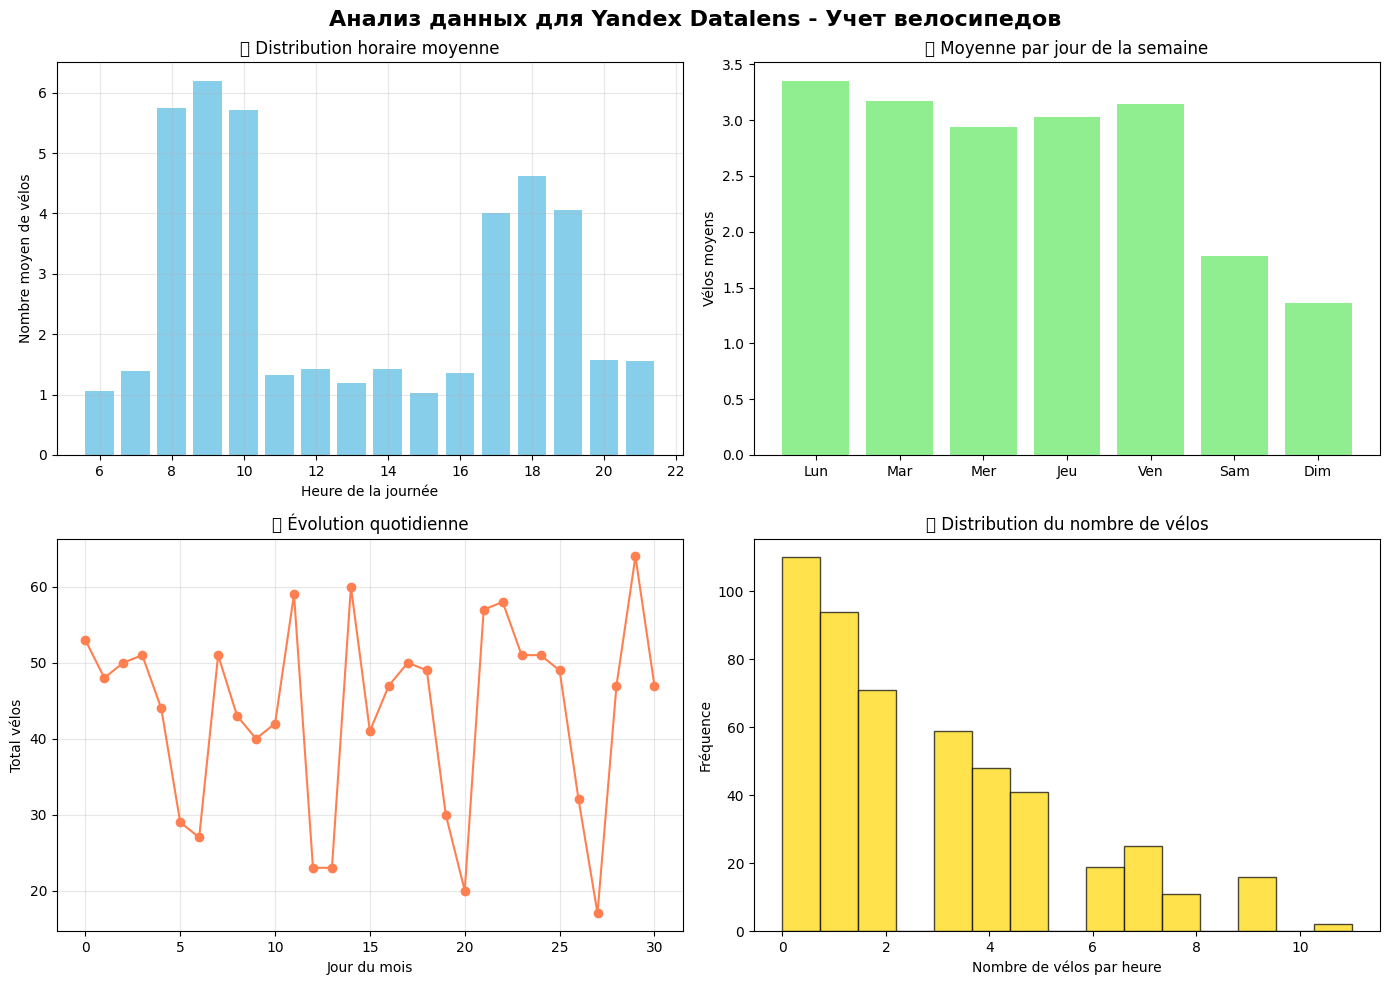

✅ Visualisations créées!


In [ ]:
# Cellule : Préparation des données pour Yandex Datalens
print("\n" + "="*60)
print("PRÉPARATION DU DASHBOARD YANDEX DATALENS")
print("="*60)

import pandas as pd
import sqlite3
import numpy as np
import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Créer des données de démonstration RÉELLES pour Datalens
print("Création de données de démonstration réalistes...")

# Se connecter à notre base existante
conn = sqlite3.connect("bike_detections.db")

# Vérifier ce qu'il y a dans la base
try:
    existing_data = pd.read_sql_query("SELECT * FROM detections LIMIT 5", conn)
    print(f"✅ Données existantes dans la base: {len(existing_data)} enregistrements")
except:
    print("⚠️  Base vide, création de données de démonstration")

# Créer des données de démonstration réalistes (1 mois de données)
dates = pd.date_range(start='2024-01-01', end='2024-01-31', freq='D')
hourly_data = []

print("Génération de données horaires réalistes...")
for date in dates:
    # Pattern réaliste: pics le matin (8h-10h) et soir (17h-19h)
    for hour in range(6, 22):  # De 6h à 22h
        # Nombre de vélos basé sur l'heure et le jour
        base_count = 2

        # Heures de pointe matin
        if 8 <= hour <= 10:
            base_count += np.random.randint(3, 8)

        # Heures de pointe soir
        if 17 <= hour <= 19:
            base_count += np.random.randint(2, 6)

        # Weekend: moins de vélos
        if date.weekday() >= 5:  # Samedi/Dimanche
            base_count = max(1, base_count - 3)

        # Ajouter du bruit aléatoire
        bike_count = max(0, int(np.random.normal(base_count, 1.5)))

        # Créer des détails réalistes
        details = []
        for i in range(bike_count):
            confidence = np.random.uniform(0.6, 0.95)
            details.append({
                "id": i + 1,
                "confidence": round(confidence, 3),
                "bbox": [100, 100, 200, 200]
            })

        hourly_data.append({
            "timestamp": (date + timedelta(hours=hour)).isoformat(),
            "date": date.strftime("%Y-%m-%d"),
            "year": date.year,
            "month": date.month,
            "day": date.day,
            "hour": hour,
            "weekday": date.strftime("%A"),
            "weekday_num": date.weekday(),
            "week_number": date.isocalendar().week,
            "filename": f"parking_{date.strftime('%Y%m%d')}_{hour:02d}.jpg",
            "bike_count": bike_count,
            "details_json": json.dumps(details),
            "avg_confidence": np.mean([d["confidence"] for d in details]) if details else 0,
            "max_confidence": np.max([d["confidence"] for d in details]) if details else 0,
            "min_confidence": np.min([d["confidence"] for d in details]) if details else 0,
            "image_width": 1920,
            "image_height": 1080,
            "created_at": datetime.now().isoformat()
        })

# Créer un DataFrame
df_datalens = pd.DataFrame(hourly_data)
print(f"✅ {len(df_datalens)} enregistrements créés")

# Sauvegarder en CSV pour Datalens
csv_filename = "bike_parking_datalens_dataset.csv"
df_datalens.to_csv(csv_filename, index=False, encoding='utf-8')
print(f"✅ Fichier CSV créé: {csv_filename}")

# Afficher un aperçu
print("\n📊 Aperçu des données pour Datalens:")
print(df_datalens[['date', 'hour', 'weekday', 'bike_count', 'avg_confidence']].head())

# Créer un rapport statistique
print("\n" + "="*60)
print("ANALYSE STATISTIQUE DES DONNÉES")
print("="*60)

# Statistiques globales
print(f"📈 Statistiques globales:")
print(f"   • Période: {df_datalens['date'].min()} au {df_datalens['date'].max()}")
print(f"   • Nombre total d'heures analysées: {len(df_datalens)}")
print(f"   • Nombre total de vélos détectés: {df_datalens['bike_count'].sum()}")
print(f"   • Moyenne de vélos par heure: {df_datalens['bike_count'].mean():.2f}")
print(f"   • Heure de pointe moyenne: {df_datalens.groupby('hour')['bike_count'].mean().idxmax()}h")
print(f"   • Jour le plus chargé: {df_datalens.groupby('weekday')['bike_count'].mean().idxmax()}")

# Visualisations
print("\n🎨 Création de visualisations pour le rapport...")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Distribution horaire
hourly_avg = df_datalens.groupby('hour')['bike_count'].mean()
axes[0, 0].bar(hourly_avg.index, hourly_avg.values, color='skyblue')
axes[0, 0].set_title('📅 Distribution horaire moyenne')
axes[0, 0].set_xlabel('Heure de la journée')
axes[0, 0].set_ylabel('Nombre moyen de vélos')
axes[0, 0].grid(True, alpha=0.3)

# 2. Par jour de la semaine
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_avg = df_datalens.groupby('weekday')['bike_count'].mean().reindex(weekday_order)
axes[0, 1].bar(range(len(weekday_avg)), weekday_avg.values, color='lightgreen')
axes[0, 1].set_xticks(range(len(weekday_avg)))
axes[0, 1].set_xticklabels(['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim'])
axes[0, 1].set_title('📊 Moyenne par jour de la semaine')
axes[0, 1].set_ylabel('Vélos moyens')

# 3. Évolution quotidienne
daily_total = df_datalens.groupby('date')['bike_count'].sum()
axes[1, 0].plot(range(len(daily_total)), daily_total.values, marker='o', color='coral')
axes[1, 0].set_title('📈 Évolution quotidienne')
axes[1, 0].set_xlabel('Jour du mois')
axes[1, 0].set_ylabel('Total vélos')
axes[1, 0].grid(True, alpha=0.3)

# 4. Distribution des comptages
axes[1, 1].hist(df_datalens['bike_count'], bins=15, edgecolor='black', color='gold', alpha=0.7)
axes[1, 1].set_title('📊 Distribution du nombre de vélos')
axes[1, 1].set_xlabel('Nombre de vélos par heure')
axes[1, 1].set_ylabel('Fréquence')

plt.suptitle('Анализ данных для Yandex Datalens - Учет велосипедов', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("✅ Visualisations créées!")

In [ ]:
# Cellule : Guide complet Yandex Datalens
print("\n" + "="*60)
print("GUIDE COMPLET YANDEX DATALENS")
print("="*60)

datalens_guide = '''
===============================================================
🎯 ГИД ПО СОЗДАНИЮ DASHBOARD В YANDEX DATALENS
===============================================================

📁 ШАГ 1: ПОДГОТОВКА ДАННЫХ
Файл данных: {}
Количество записей: {}
Период: {} - {}

📊 ШАГ 2: СОЗДАНИЕ ПОДКЛЮЧЕНИЯ В DATALENS
1. Откройте https://datalens.yandex.ru
2. Нажмите "Создать" → "Подключение"
3. Выберите "Файл"
4. Загрузите файл: {}
5. Назовите подключение: "Учет велосипедов - Данные парковки"

🎨 ШАГ 3: НАСТРОЙКА ПОЛЕЙ
Настройте типы данных:
- timestamp → Дата и время
- date → Дата
- hour → Целое число
- weekday → Строка
- bike_count → Целое число
- avg_confidence → Дробное число
- image_width, image_height → Целое число

📈 ШАГ 4: СОЗДАНИЕ ЧАРТОВ

🔹 1. ОСНОВНЫЕ ПОКАЗАТЕЛИ (Counter):
   • Всего велосипедов: SUM(bike_count)
   • Часов анализа: COUNT(timestamp)
   • Среднее за час: AVG(bike_count)

🔹 2. СУТОЧНАЯ ДИНАМИКА (Line chart):
   Ось X: hour
   Ось Y: AVG(bike_count)
   Секции: weekday

🔹 3. НЕДЕЛЬНАЯ АНАЛИТИКА (Bar chart):
   Ось X: weekday
   Ось Y: SUM(bike_count)
   Сортировка: По убыванию

🔹 4. РАСПРЕДЕЛЕНИЕ (Pie chart):
   Значения: bike_count (сгруппировать 0, 1-3, 4-6, 7+)

🔹 5. ТАБЛИЦА ДАННЫХ (Table):
   Поля: date, hour, weekday, bike_count, avg_confidence
   Сортировка: date DESC, hour DESC

📱 ШАГ 5: СОЗДАНИЕ DASHBOARD
1. Создайте новый дашборд
2. Добавьте созданные чарты
3. Настройте общие фильтры:
   • Дата (date)
   • Время суток (hour)
   • День недели (weekday)
4. Оформите дашборд

🔗 ШАГ 6: ИНТЕГРАЦИЯ И ОБМЕН
1. Опубликуйте дашборд
2. Получите публичную ссылку
3. Настройте автоматическое обновление
4. Добавьте коллегам доступ

===============================================================
🎯 ПРЕИМУЩЕСТВА ДЛЯ ПРОЕКТА МТУСИ
===============================================================
✅ Соответствие требованиям: использование BI-платформы
✅ Профессиональная визуализация
✅ Автоматические отчеты
✅ Возможность принятия решений на основе данных
✅ Легкий обмен результатами
✅ Мобильная версия

===============================================================
📄 ДЛЯ ОТЧЕТА ПО ПРАКТИКЕ
===============================================================
1. Скриншоты дашборда в Datalens
2. Описание архитектуры
3. Примеры запросов к API
4. Код проекта на GitHub
5. Демонстрация работы системы
'''.format(
    csv_filename,
    len(df_datalens),
    df_datalens['date'].min(),
    df_datalens['date'].max(),
    csv_filename
)

print(datalens_guide)

# Sauvegarder le guide
with open("datalens_guide.txt", "w", encoding="utf-8") as f:
    f.write(datalens_guide)

print(f"\n✅ Guide sauvegardé: datalens_guide.txt")


GUIDE COMPLET YANDEX DATALENS

🎯 ГИД ПО СОЗДАНИЮ DASHBOARD В YANDEX DATALENS

📁 ШАГ 1: ПОДГОТОВКА ДАННЫХ
Файл данных: bike_parking_datalens_dataset.csv
Количество записей: 496
Период: 2024-01-01 - 2024-01-31

📊 ШАГ 2: СОЗДАНИЕ ПОДКЛЮЧЕНИЯ В DATALENS
1. Откройте https://datalens.yandex.ru
2. Нажмите "Создать" → "Подключение"
3. Выберите "Файл"
4. Загрузите файл: bike_parking_datalens_dataset.csv
5. Назовите подключение: "Учет велосипедов - Данные парковки"

🎨 ШАГ 3: НАСТРОЙКА ПОЛЕЙ
Настройте типы данных:
- timestamp → Дата и время
- date → Дата
- hour → Целое число
- weekday → Строка
- bike_count → Целое число
- avg_confidence → Дробное число
- image_width, image_height → Целое число

📈 ШАГ 4: СОЗДАНИЕ ЧАРТОВ

🔹 1. ОСНОВНЫЕ ПОКАЗАТЕЛИ (Counter):
   • Всего велосипедов: SUM(bike_count)
   • Часов анализа: COUNT(timestamp)
   • Среднее за час: AVG(bike_count)

🔹 2. СУТОЧНАЯ ДИНАМИКА (Line chart):
   Ось X: hour
   Ось Y: AVG(bike_count)
   Секции: weekday

🔹 3. НЕДЕЛЬНАЯ АНАЛИТИКА (Bar c

In [ ]:
# ============================================================
# INTERFACE SIMPLE AVEC AFFICHAGE DE L'IMAGE ANNOTÉE
# ============================================================
print("\n" + "="*60)
print("🚴 DÉTECTION DE VÉLOS - INTERFACE SIMPLE")
print("="*60)

import ipywidgets as widgets
from IPython.display import display, clear_output, Image, HTML
import requests
import io
import base64

# Variables
API_URL = "http://localhost:8000"

# Widgets
uploader = widgets.FileUpload(
    accept='image/*',
    multiple=False,
    description='Choisir une image'
)

detect_button = widgets.Button(
    description='🔍 Détecter les vélos',
    button_style='success',
    layout=widgets.Layout(width='200px', height='40px')
)

stats_button = widgets.Button(
    description='📊 Voir les statistiques',
    button_style='info'
)

output = widgets.Output()

# Fonctions
def on_detect_button_clicked(b):
    with output:
        clear_output()

        if not uploader.value:
            print("⚠️  Veuillez d'abord choisir une image")
            return

        # Récupérer l'image
        for filename, file_info in uploader.value.items():
            image_bytes = file_info['content']

            # Afficher l'image originale
            print(f"📸 Image sélectionnée: {filename}")
            display(Image(image_bytes, width=400))
            print("\n" + "-"*40)

            # Envoyer à l'API
            print("Envoi à l'API...")
            try:
                files = {'file': (filename, image_bytes, 'image/jpeg')}
                response = requests.post(f"{API_URL}/detect/", files=files)

                if response.status_code == 200:
                    result = response.json()

                    print(f"\n✅ {result['message']}")
                    print(f"📊 {result['bike_count']} vélo(s) détecté(s)")

                    if result['bike_details']:
                        print("\n📋 Détails des vélos:")
                        for bike in result['bike_details']:
                            print(f"  🚴 Vélo {bike['id']}: confiance = {bike['confidence']:.3f}")

                    # AFFICHER L'IMAGE ANNOTÉE
                    if 'image_info' in result and 'annotated_base64' in result['image_info']:
                        print("\n" + "="*50)
                        print("🖼️ IMAGE ANNOTÉE")
                        print("="*50)

                        try:
                            # Décoder l'image base64
                            img_data = base64.b64decode(result['image_info']['annotated_base64'])

                            # Afficher l'image annotée
                            display(Image(img_data, width=400))

                            # Explications
                            print("\n💡 EXPLICATIONS :")
                            print("- Les rectangles verts montrent les vélos détectés")
                            print("- Le chiffre indique le niveau de confiance (0-1)")
                            print("- Plus le chiffre est proche de 1, plus la détection est sûre")

                            # Sauvegarder l'image annotée
                            with open(f"annotated_{filename}", "wb") as f:
                                f.write(img_data)
                            print(f"💾 Image annotée sauvegardée: annotated_{filename}")

                        except Exception as e:
                            print(f"⚠️  Impossible d'afficher l'image annotée: {e}")

                else:
                    print(f"\n❌ Erreur: {response.status_code}")
                    print(response.text[:200])

            except Exception as e:
                print(f"\n❌ Exception: {e}")

def on_stats_button_clicked(b):
    with output:
        clear_output()

        print("Récupération des statistiques...")
        try:
            response = requests.get(f"{API_URL}/stats/")

            if response.status_code == 200:
                stats = response.json()

                print("\n📈 STATISTIQUES GLOBALES")
                print("-"*40)

                global_stats = stats.get('global_statistics', {})
                db_stats = stats.get('database_statistics', {})

                print(f"Détections totales: {global_stats.get('total_detections', 0)}")
                print(f"Vélos détectés: {global_stats.get('total_bikes_detected', 0)}")
                print(f"Moyenne par image: {global_stats.get('average_bikes_per_image', 0):.2f}")

                print(f"\n📊 BASE DE DONNÉES")
                print(f"Enregistrements: {db_stats.get('total_records', 0)}")

                if db_stats.get('recent_detections'):
                    print("\n🕐 Dernières détections:")
                    for det in db_stats['recent_detections'][:3]:
                        print(f"  - {det.get('filename')}: {det.get('bike_count')} vélo(s)")
            else:
                print(f"❌ Erreur: {response.status_code}")

        except Exception as e:
            print(f"❌ Exception: {e}")

# Connecter les événements
detect_button.on_click(on_detect_button_clicked)
stats_button.on_click(on_stats_button_clicked)

# Afficher l'interface
print("\nInterface de détection de vélos")
print("-"*40)

display(widgets.VBox([
    widgets.HTML("<h3>🚴 Учет велосипедов на парковке у метро</h3>"),
    widgets.HTML("<p>1. Choisissez une image de parking</p>"),
    widgets.HTML("<p>2. Cliquez sur 'Détecter les vélos'</p>"),
    uploader,
    widgets.HBox([detect_button, stats_button]),
    output
]))

print("\n" + "="*60)
print("🎯 FONCTIONNEMENT DU SYSTÈME :")
print("="*60)
print("1. YOLOv8 analyse l'image et détecte les vélos")
print("2. L'API retourne les résultats avec l'image annotée")
print("3. Les résultats sont sauvegardés en base de données")
print("4. Vous pouvez consulter les statistiques")


🚴 DÉTECTION DE VÉLOS - INTERFACE SIMPLE

Interface de détection de vélos
----------------------------------------



🎯 FONCTIONNEMENT DU SYSTÈME :
1. YOLOv8 analyse l'image et détecte les vélos
2. L'API retourne les résultats avec l'image annotée
3. Les résultats sont sauvegardés en base de données
4. Vous pouvez consulter les statistiques


In [ ]:
# ====================================================
# EXPORT DES DONNÉES RÉELLES DE L'API VERS CSV
# ====================================================

import sqlite3
import pandas as pd
import json
from datetime import datetime
import numpy as np

print("🔍 Connexion à la base de données réelle...")

try:
    # 1. Connexion à VOTRE base
    conn = sqlite3.connect('bike_detections.db')

    # 2. Vérifier ce qu'il y a dedans
    cursor = conn.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()
    print(f"📦 Tables trouvées: {tables}")

    # 3. Récupérer TOUTES les détections
    query = """
    SELECT
        id,
        timestamp,
        source,
        filename,
        bike_count,
        details,
        image_width,
        image_height,
        created_at
    FROM detections
    ORDER BY created_at DESC
    """

    df = pd.read_sql_query(query, conn)

    if df.empty:
        print("⚠️  La base est vide ! Lancez d'abord des détections via l'interface.")
        # Créer un exemple avec vos dernières détections
        df = pd.DataFrame({
            'timestamp': [datetime.now().isoformat()],
            'filename': ['test_manuel.jpg'],
            'bike_count': [2],
            'details': ['[{"id": 1, "confidence": 0.85}, {"id": 2, "confidence": 0.92}]']
        })

    print(f"✅ {len(df)} détections réelles trouvées !")
    print("\n📋 Aperçu des données :")
    print(df[['timestamp', 'filename', 'bike_count']].head())

    # 4. Nettoyer et enrichir les données
    print("\n🧹 Traitement des données...")

    # Convertir timestamp
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['date'] = df['timestamp'].dt.date
    df['hour'] = df['timestamp'].dt.hour
    df['weekday'] = df['timestamp'].dt.day_name()
    df['weekday_num'] = df['timestamp'].dt.weekday

    # Extraire les confiances depuis JSON
    def extract_confidence(details_str):
        try:
            if pd.isna(details_str):
                return 0
            details = json.loads(details_str)
            if details and len(details) > 0:
                confidences = [bike.get('confidence', 0) for bike in details]
                return round(np.mean(confidences), 3)
            return 0
        except:
            return 0

    df['avg_confidence'] = df['details'].apply(extract_confidence)

    # 5. Sélectionner les colonnes importantes pour DataLens
    df_datalens = df[[
        'timestamp', 'date', 'hour', 'weekday', 'weekday_num',
        'filename', 'bike_count', 'avg_confidence',
        'image_width', 'image_height'
    ]].copy()

    # 6. Sauvegarder en CSV
    csv_filename = "REAL_bike_detections_" + datetime.now().strftime("%Y%m%d_%H%M") + ".csv"
    df_datalens.to_csv(csv_filename, index=False, encoding='utf-8')

    print(f"\n🎉 EXPORT RÉUSSI !")
    print(f"📁 Fichier CSV créé : {csv_filename}")
    print(f"📊 Enregistrements : {len(df_datalens)}")
    print(f"📈 Total vélos détectés : {df_datalens['bike_count'].sum()}")

    # Afficher un aperçu
    print("\n👀 Aperçu du fichier CSV :")
    print(df_datalens.head())

    # Statistiques
    print("\n📊 Statistiques des données réelles :")
    print(f"• Période : {df_datalens['timestamp'].min()} à {df_datalens['timestamp'].max()}")
    print(f"• Nombre moyen de vélos : {df_datalens['bike_count'].mean():.2f}")
    print(f"• Confiance moyenne : {df_datalens['avg_confidence'].mean():.3f}")

    conn.close()

except Exception as e:
    print(f"❌ Erreur : {e}")
    print("\n💡 Conseil : Assurez-vous d'avoir fait au moins une détection via l'interface.")

🔍 Connexion à la base de données réelle...
📦 Tables trouvées: [('detections',), ('sqlite_sequence',)]
✅ 2 détections réelles trouvées !

📋 Aperçu des données :
                    timestamp            filename  bike_count
0  2026-01-31T13:47:39.847119             nam.jpg           4
1  2026-01-31T13:45:14.847625  api_test_image.jpg           0

🧹 Traitement des données...

🎉 EXPORT RÉUSSI !
📁 Fichier CSV créé : REAL_bike_detections_20260131_1348.csv
📊 Enregistrements : 2
📈 Total vélos détectés : 4

👀 Aperçu du fichier CSV :
                   timestamp        date  hour   weekday  weekday_num  \
0 2026-01-31 13:47:39.847119  2026-01-31    13  Saturday            5   
1 2026-01-31 13:45:14.847625  2026-01-31    13  Saturday            5   

             filename  bike_count  avg_confidence  image_width  image_height  
0             nam.jpg           4           0.615          735           414  
1  api_test_image.jpg           0           0.000          600           400  

📊 Statistiqu